In [1]:
import pandas as pd
import numpy as np
from numpy import NaN, NAN, nan
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.0f}'.format

In [2]:
    df = pd.read_excel('../Outputs/GIS_Lump_Excels/Lump0816_365_515_Mataranka.xlsx')

#change 08 and 16 to strings
df['CODE_08'] = df['LU_NO'].astype(str)
df['CODE_16'] = df['LU_CODEN'].astype(str)

# make the new columns for LU08 using string indexing
df['prim_08'] = df['CODE_08'].str[0:1]
df['secon_08'] = df['CODE_08'].str[:2]
df['third_08'] = df['CODE_08'].str[0:3]

# make the new columns for LU16 using string indexing
df['prim_16'] = df['CODE_16'].str[0:1]
df['secon_16'] = df['CODE_16'].str[:2]
df['third_16'] = df['CODE_16'].str[0:3]

#change 08 and 16 to intigers
df['seconint_16'] = df['secon_16'].astype(int)
df['seconint_08'] = df['secon_08'].astype(int)

#convet area to ha
df['AREA_08_ha'] = (df['AREA_08_M2'] / 10000)
df['AREA_16_ha'] = (df['AREA_16_M2'] / 10000)

# Group by land use and calculate the sum of area
df16 = df.groupby('secon_16')['AREA_16_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

df8 = df.groupby('secon_08')['AREA_08_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

#dflabel = df.groupby('secon_16')['AREA_16_M2'].agg([
    #np.sum,
    #np.mean,
    #np.count_nonzero,]).reset_index()
    

#Change the column names so that they can be concatinated
df16.columns = ['Land Use', 'Sum', 'Mean', 'Std', 'Count non zero']
df8.columns = ['Land Use', 'Sum', 'Mean', 'Std','Count non zero']


concat = pd.concat([df16, df8])

final = pd.merge(df16, df8,
                left_on='Land Use', right_on='Land Use',
                how = 'left')

#Change the column names so for analysis
final.columns = ['Land Use', 'Sum 2016', 'Mean 2016', 'Std 2016', 'Count 2016',
              'Sum 2008', 'Mean 2008', 'Std 2008', 'Count 2008']

final['% Change Area'] = (((final['Sum 2016'] - final['Sum 2008'])- final['Sum 2016'])*100)
final['% Change Count'] = (((final['Count 2016'] - final['Count 2008'])- final['Count 2016'])*100)

#final.fillna(0)

final.to_excel('../Outputs/Pandas_Lump_Excels/Mattaranka_Grouped_Lump0816_365_515.xlsx')
final

,Land Use,Sum 2016,Mean 2016,Std 2016,Count 2016,Sum 2008,Mean 2008,Std 2008,Count 2008,% Change Area,% Change Count
0,41,850,850,nan,1,nan,nan,nan,nan,nan,nan
1,44,319,27,40,12,nan,nan,nan,nan,nan,nan
2,45,806,90,36,9,nan,nan,nan,nan,nan,nan
3,46,4,4,nan,1,nan,nan,nan,nan,nan,nan


Text(0.5,1,'interesting graph\nCheck out my line graph')

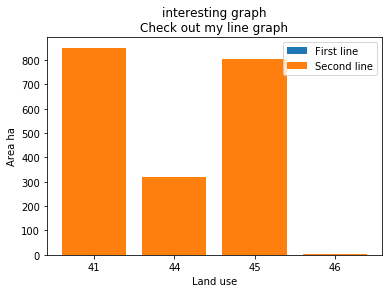

In [3]:
#Plot a bar graph
plt.title("interesting graph\nCheck it out")
x1 = final['Land Use']
x2 = final['Land Use']
y1 = final['Sum 2008']
y2 = final['Sum 2016']
plt.bar(x1, y1, label = 'First line')
plt.bar(x2, y2, label = 'Second line')
plt.xlabel('Land use')
plt.ylabel('Area ha')
plt.legend()
plt.title("interesting graph\nCheck out my line graph")